# Figure 2 Tumor specific stromal and immune cell types in HCC

#  

## Endothelial cells 

In [18]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
import scvelo as scv
import loompy
import scanpy as sc
scv.logging.print_version()

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

adata = sc.read("./data/endo_73k.h5ad")

Running scvelo 0.1.24 (python 3.7.1) on 2020-09-17 16:57.
scanpy==1.4 anndata==0.6.19 numpy==1.17.4 scipy==1.1.0 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
sc.settings.set_figure_params(dpi=100, color_map='viridis')

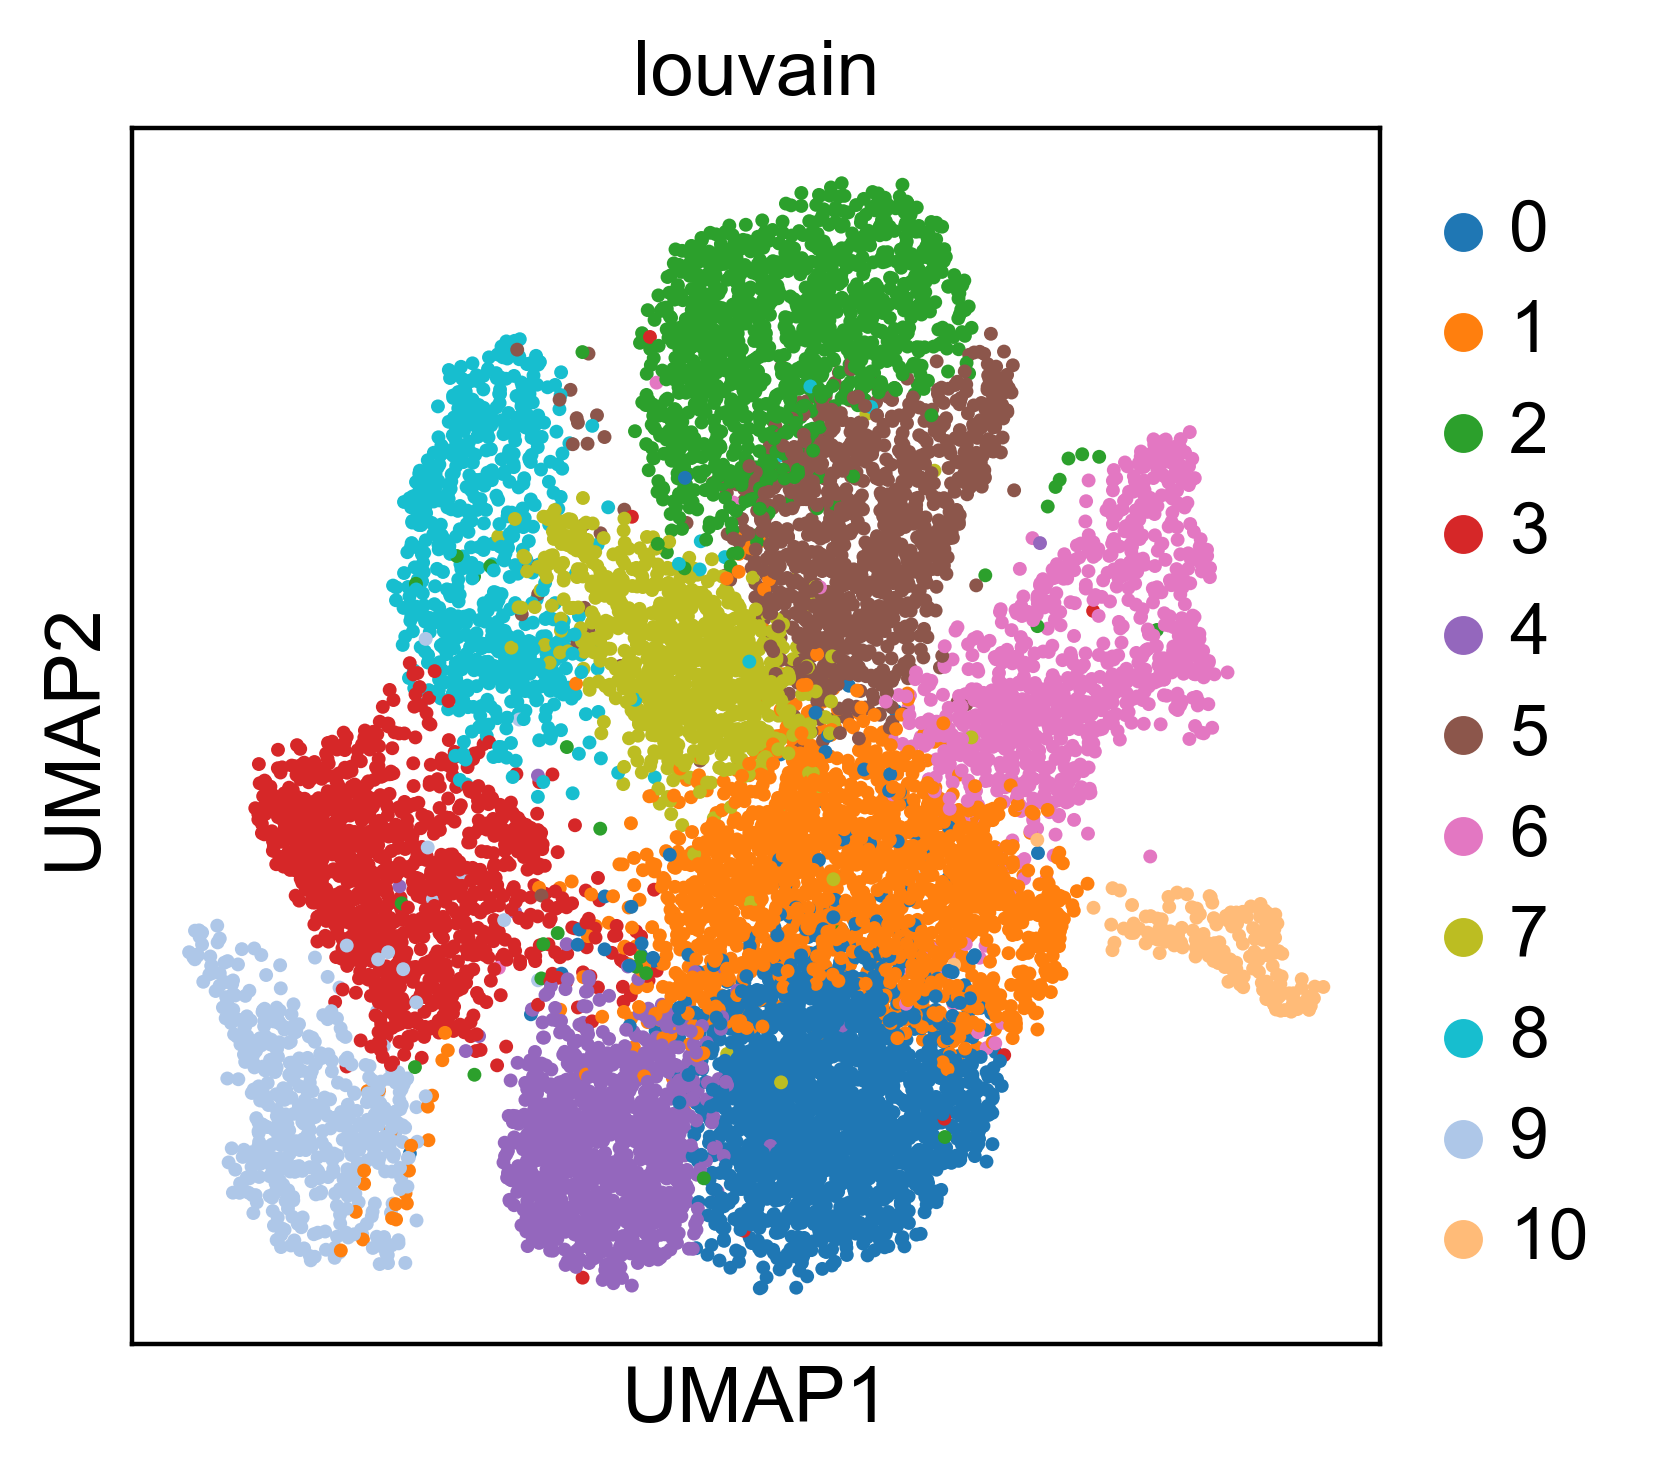

In [3]:
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.pl.umap(adata, color='louvain',size=25)#, save='_louvain.png')

### PNC (Peripheral Tumor, Adjacent Normal, Core Tumor)

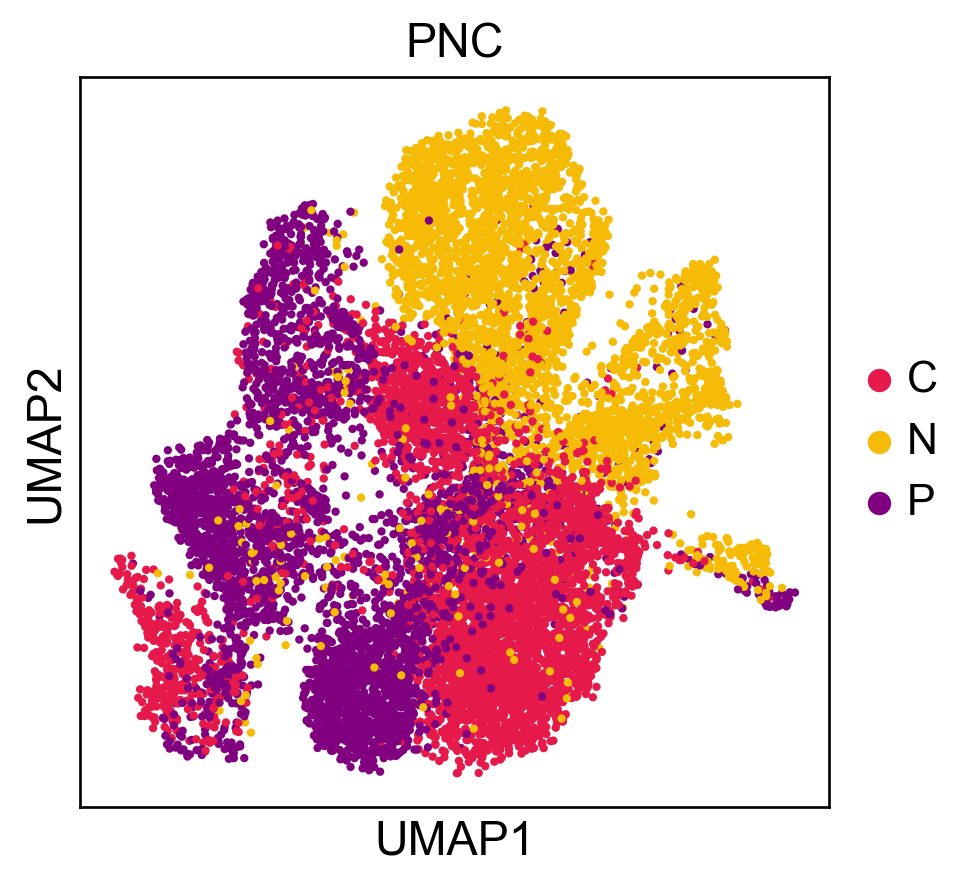

In [4]:
sc.settings.set_figure_params(dpi=120, color_map='viridis')
sc.pl.umap(adata, color=['PNC'], size=25, palette=['#e6194b', '#f5bb06', '#81007f'])

AnnData object with n_obs × n_vars = 11672 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'mean genes exp', 'median genes exp'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

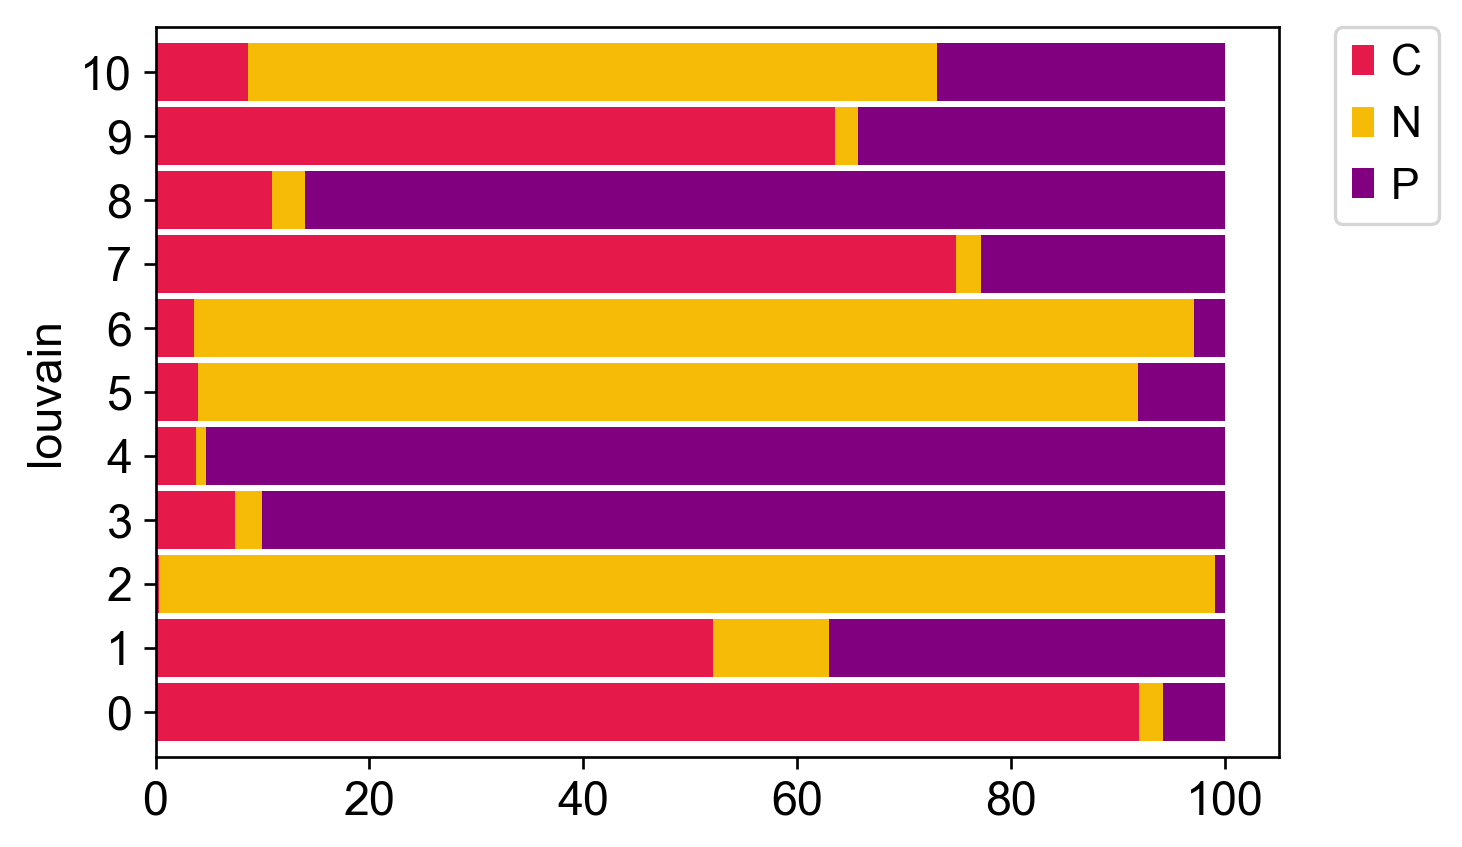

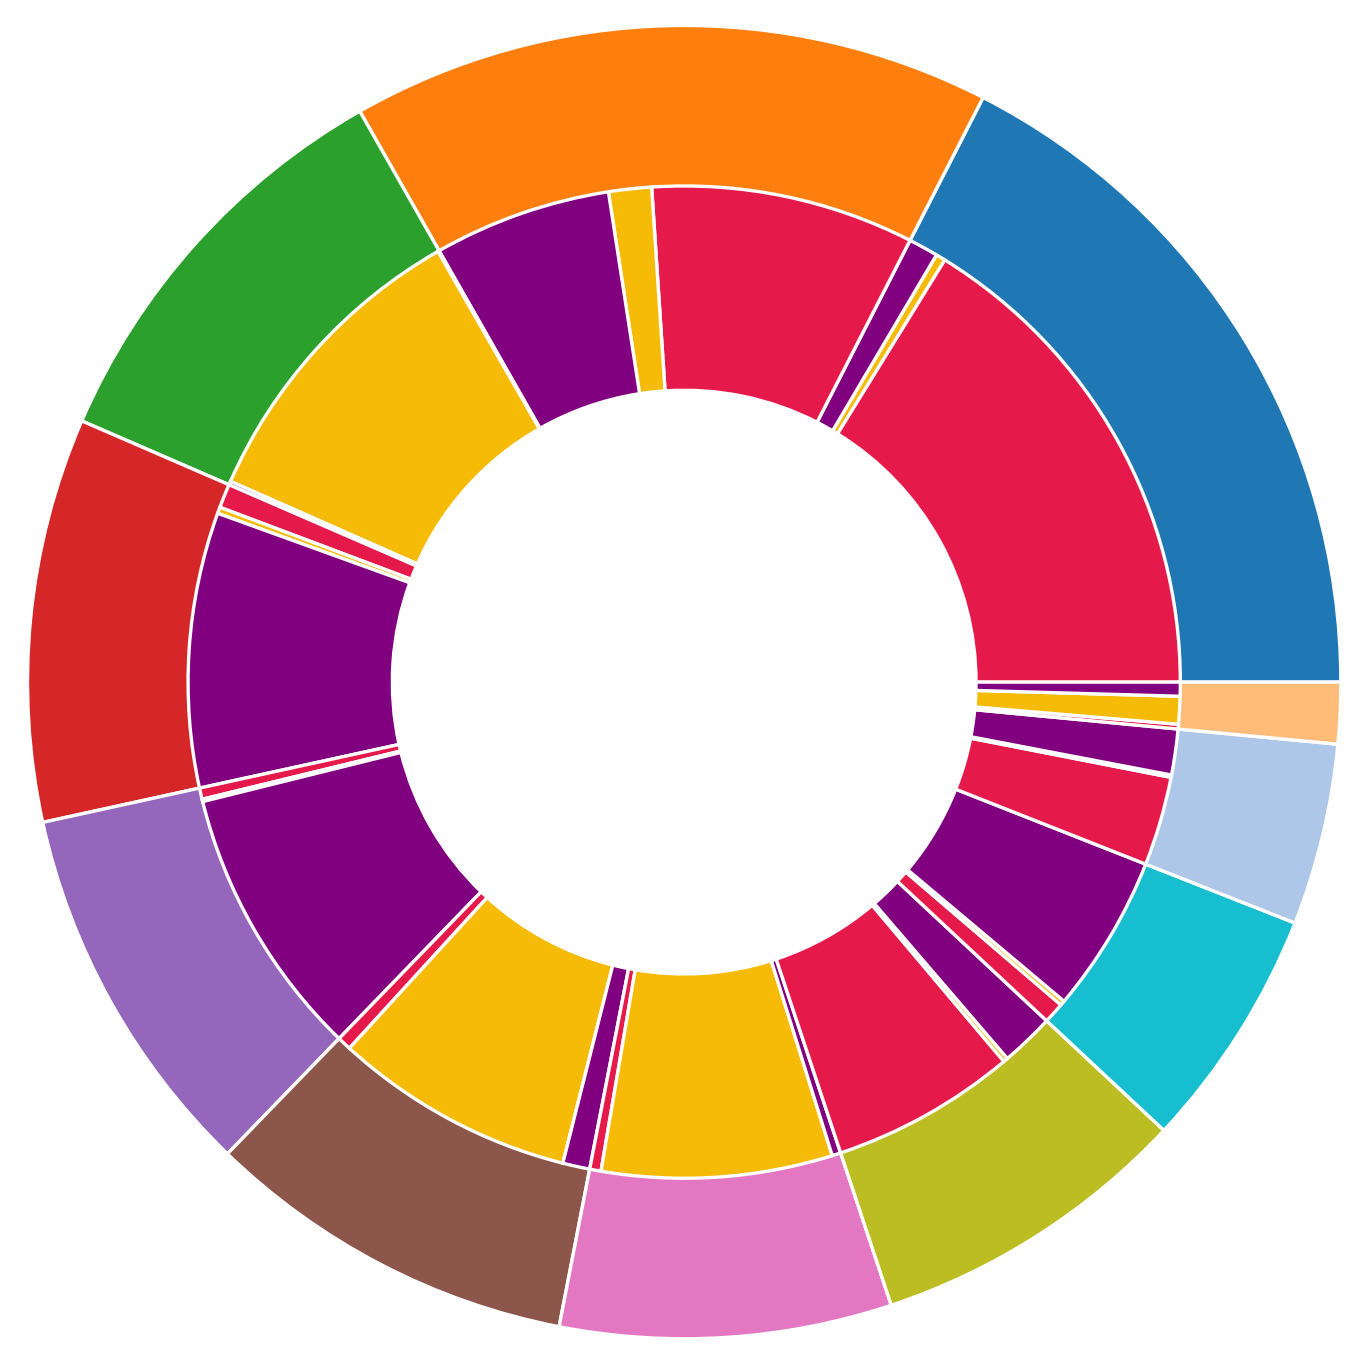

In [5]:
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = adata.obs.groupby('PNC').size()

df = adata.obs.groupby(['PNC','louvain']).size().unstack().fillna(0)
df = df.div(count, axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=['#e6194b', '#f5bb06', '#81007f'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_NT.pdf')

NT = adata.obs.groupby(['louvain','PNC']).size()
NT

fig, ax = plt.subplots()

size = 0.7
vals = np.array(NT.unstack())

outer_colors = adata.uns['louvain_colors']
inner_colors = ['#e6194b', '#f5bb06', '#81007f']

ax.pie(vals.sum(axis=1), radius=2.5-0.25, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=2.3-0.6, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()
#fig.savefig('piechart__HCC_mye_PNC.pdf', bbox_inches='tight')
plt.close(fig) 

### Violin Plot

Previous size: [6.0, 4.0]
Current size: [8, 4]


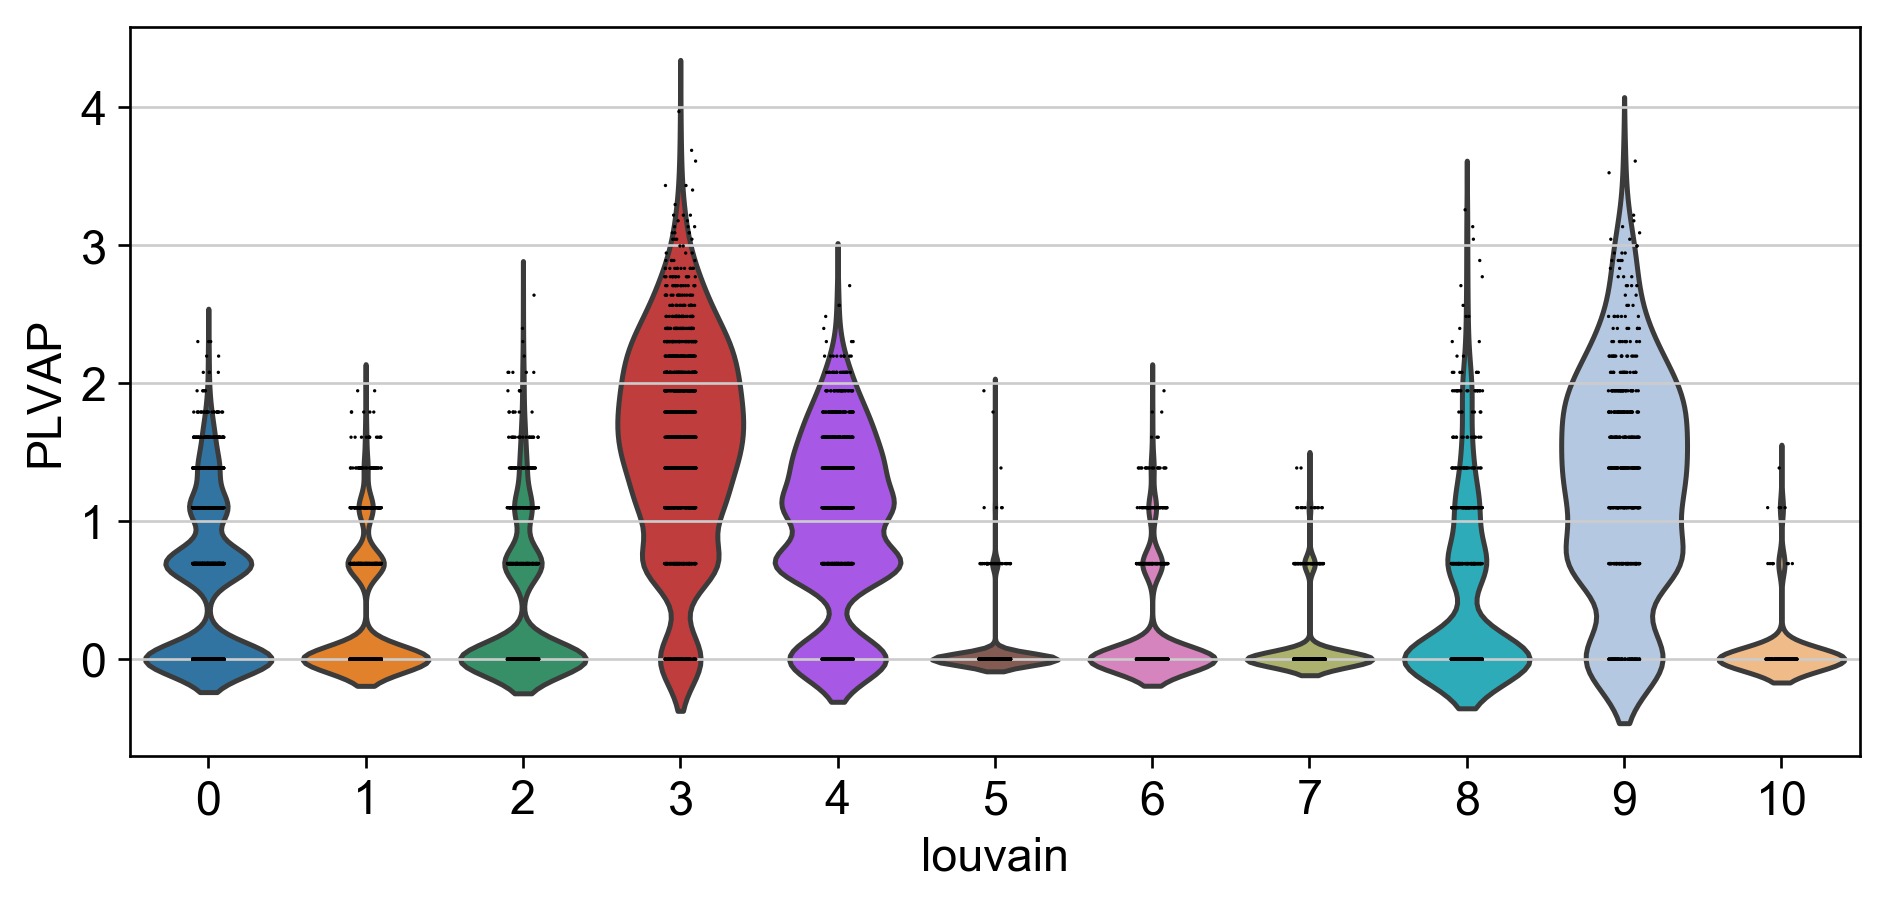

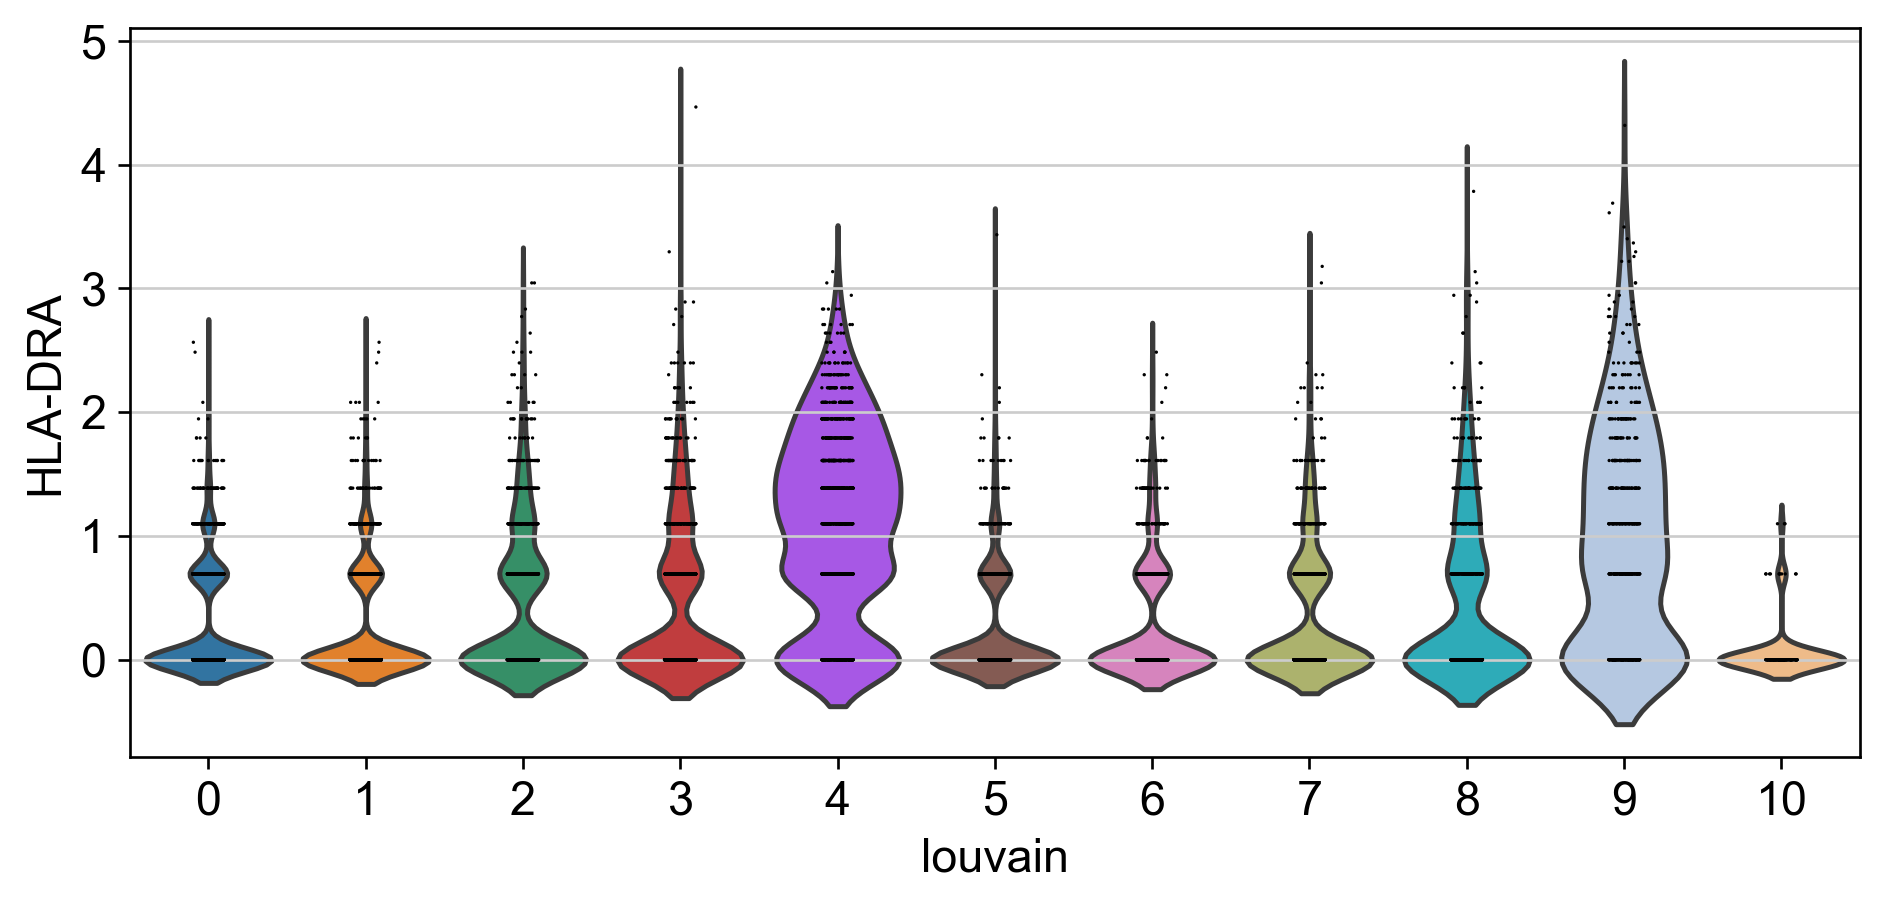

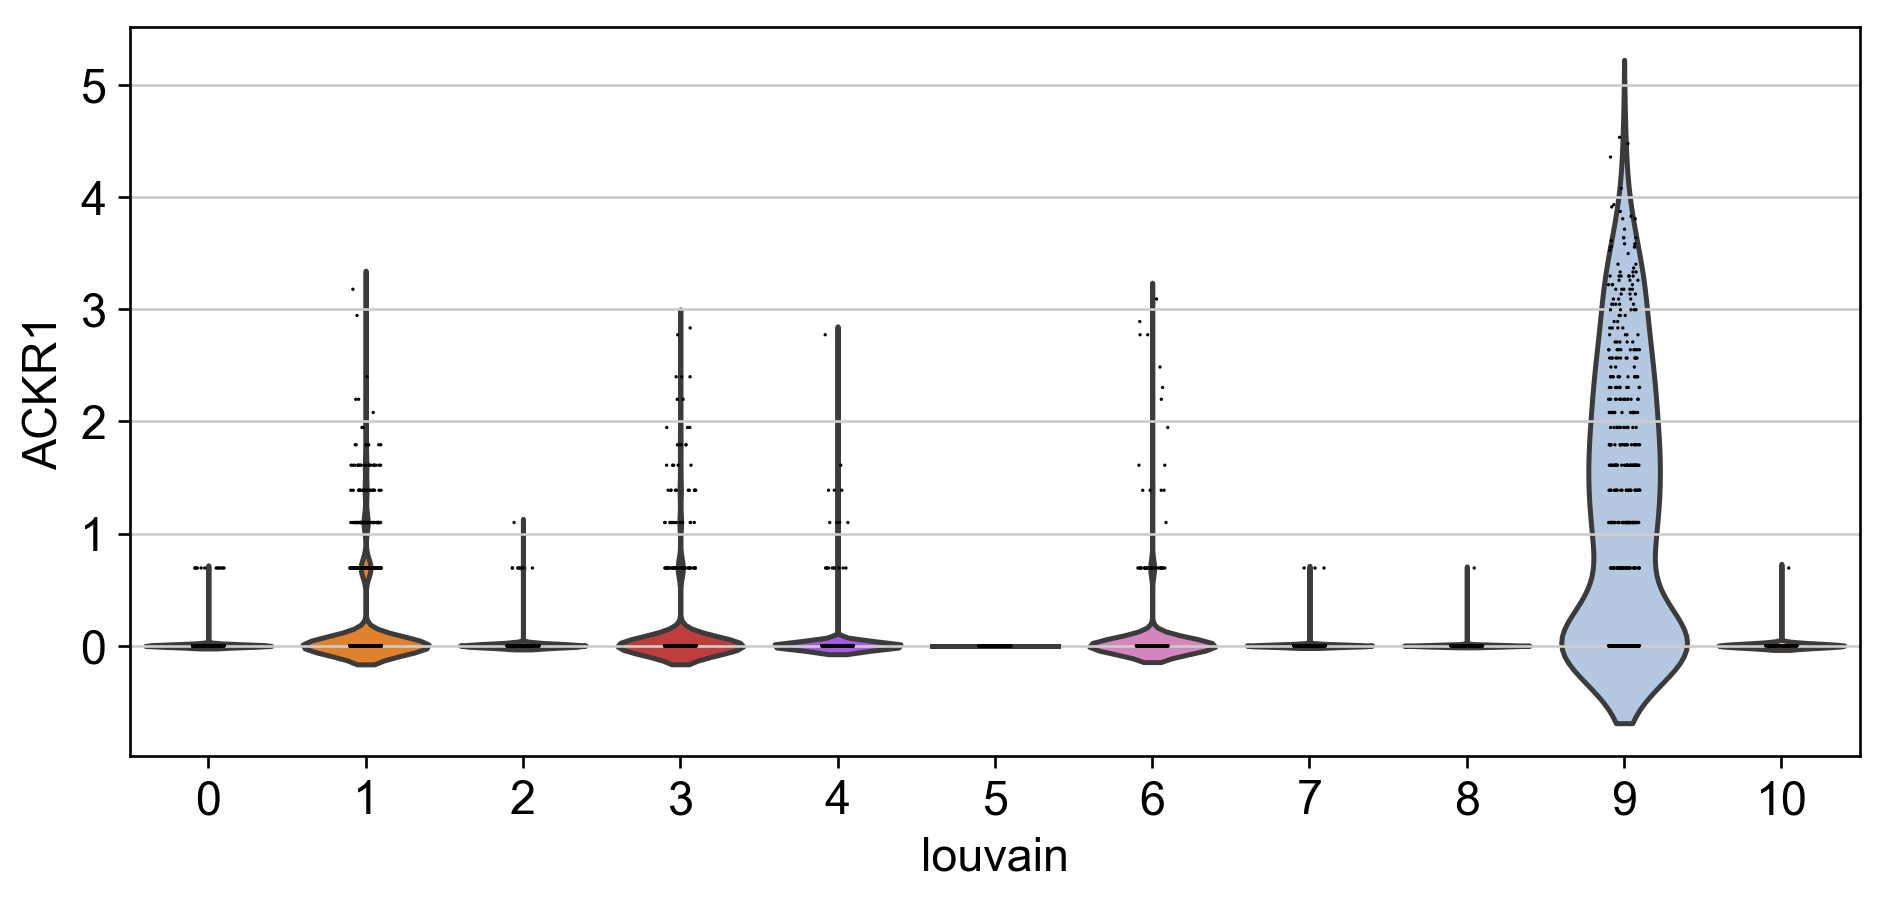

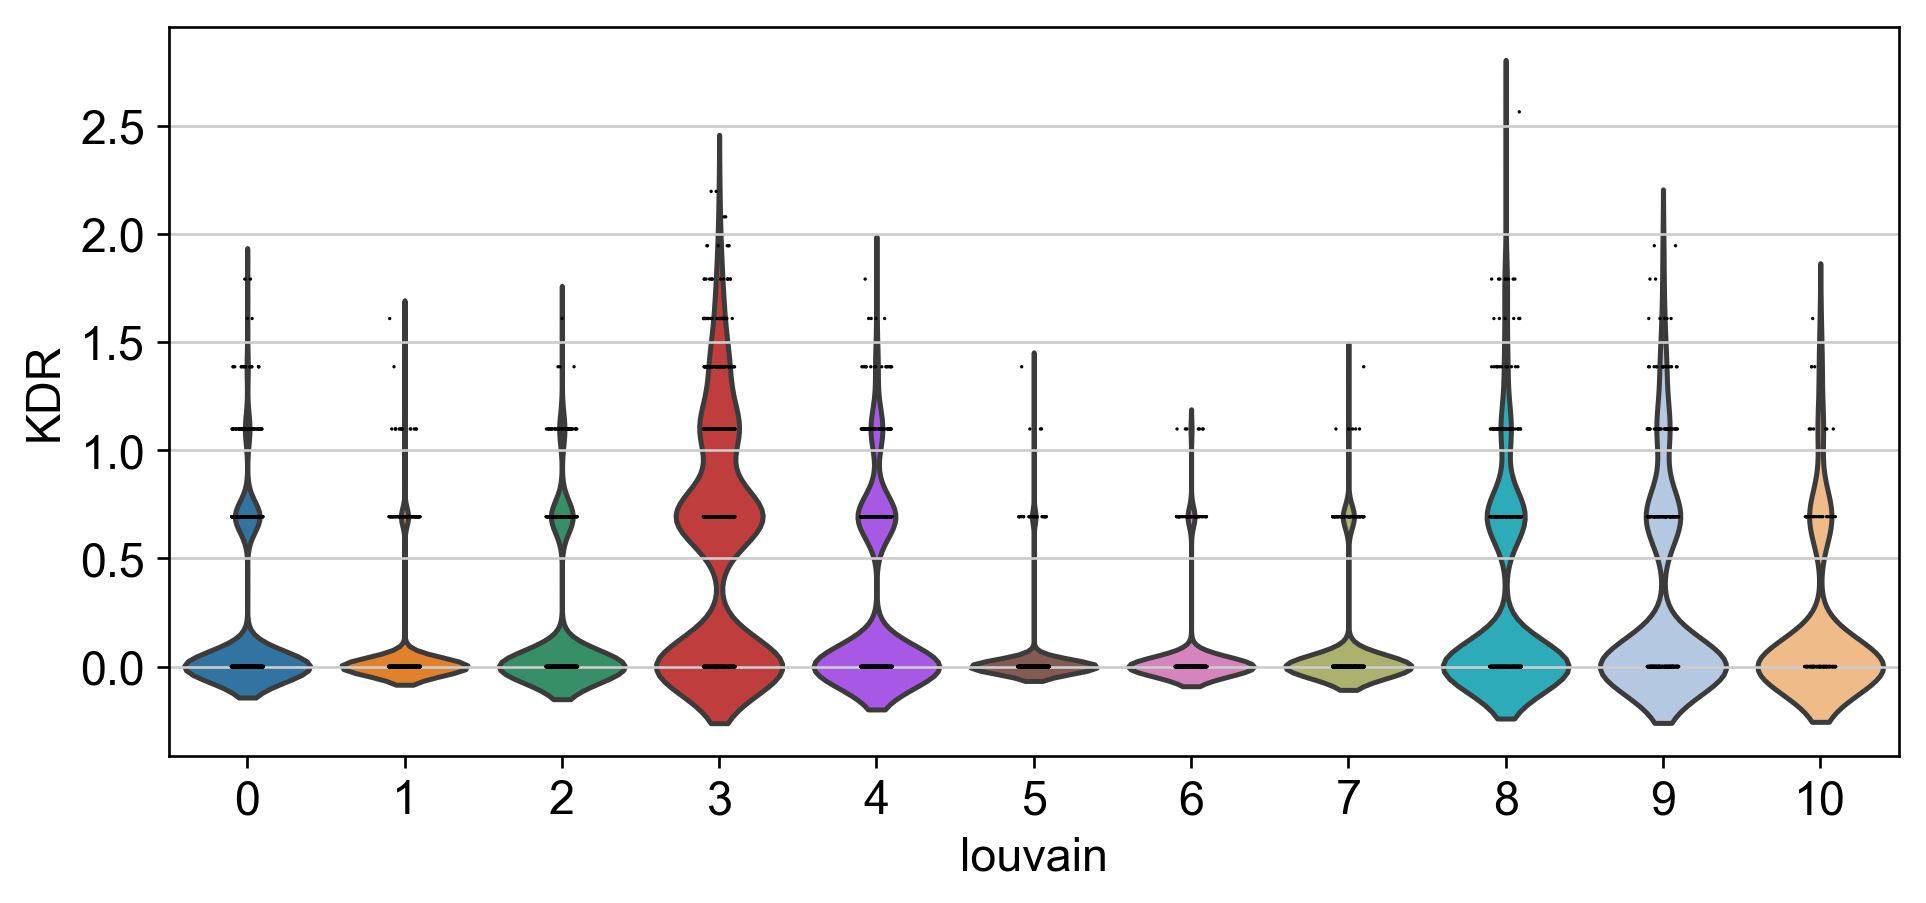

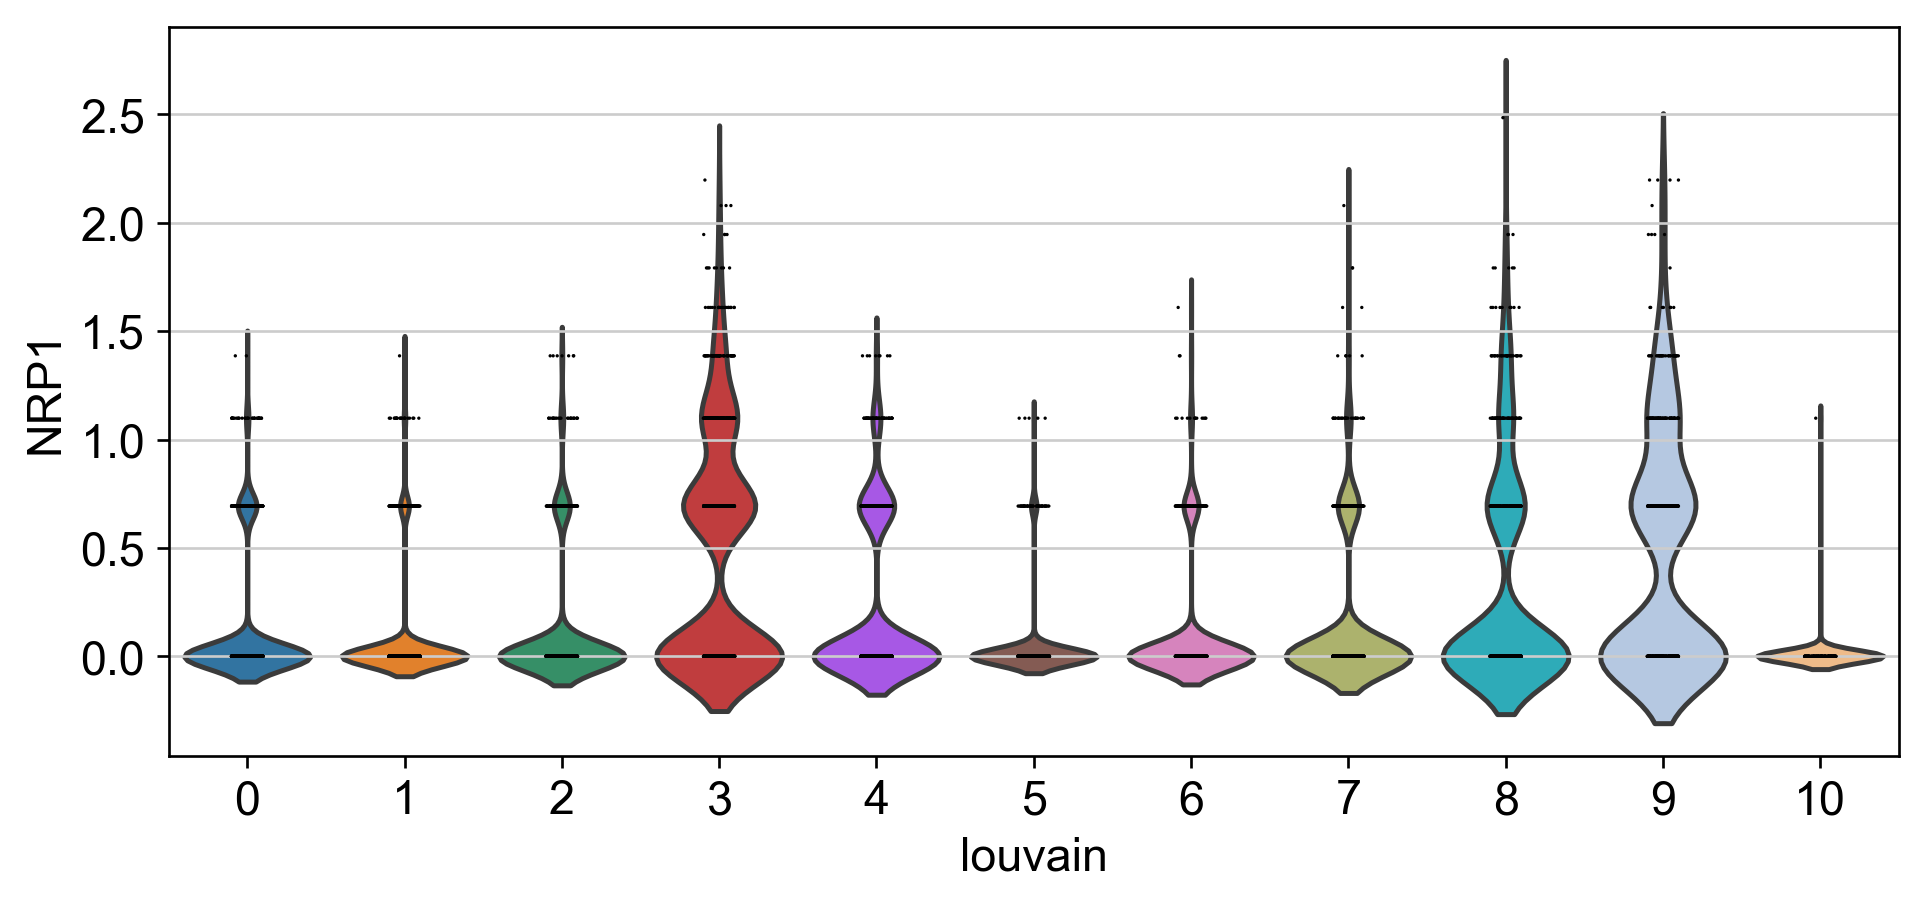

In [6]:
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Previous size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

sc.pl.violin(adata, ['PLVAP'], groupby='louvain')
sc.pl.violin(adata, ['HLA-DRA'], groupby='louvain')
sc.pl.violin(adata, ['ACKR1'], groupby='louvain')
sc.pl.violin(adata, ['KDR'], groupby='louvain')
sc.pl.violin(adata, ['NRP1'], groupby='louvain')

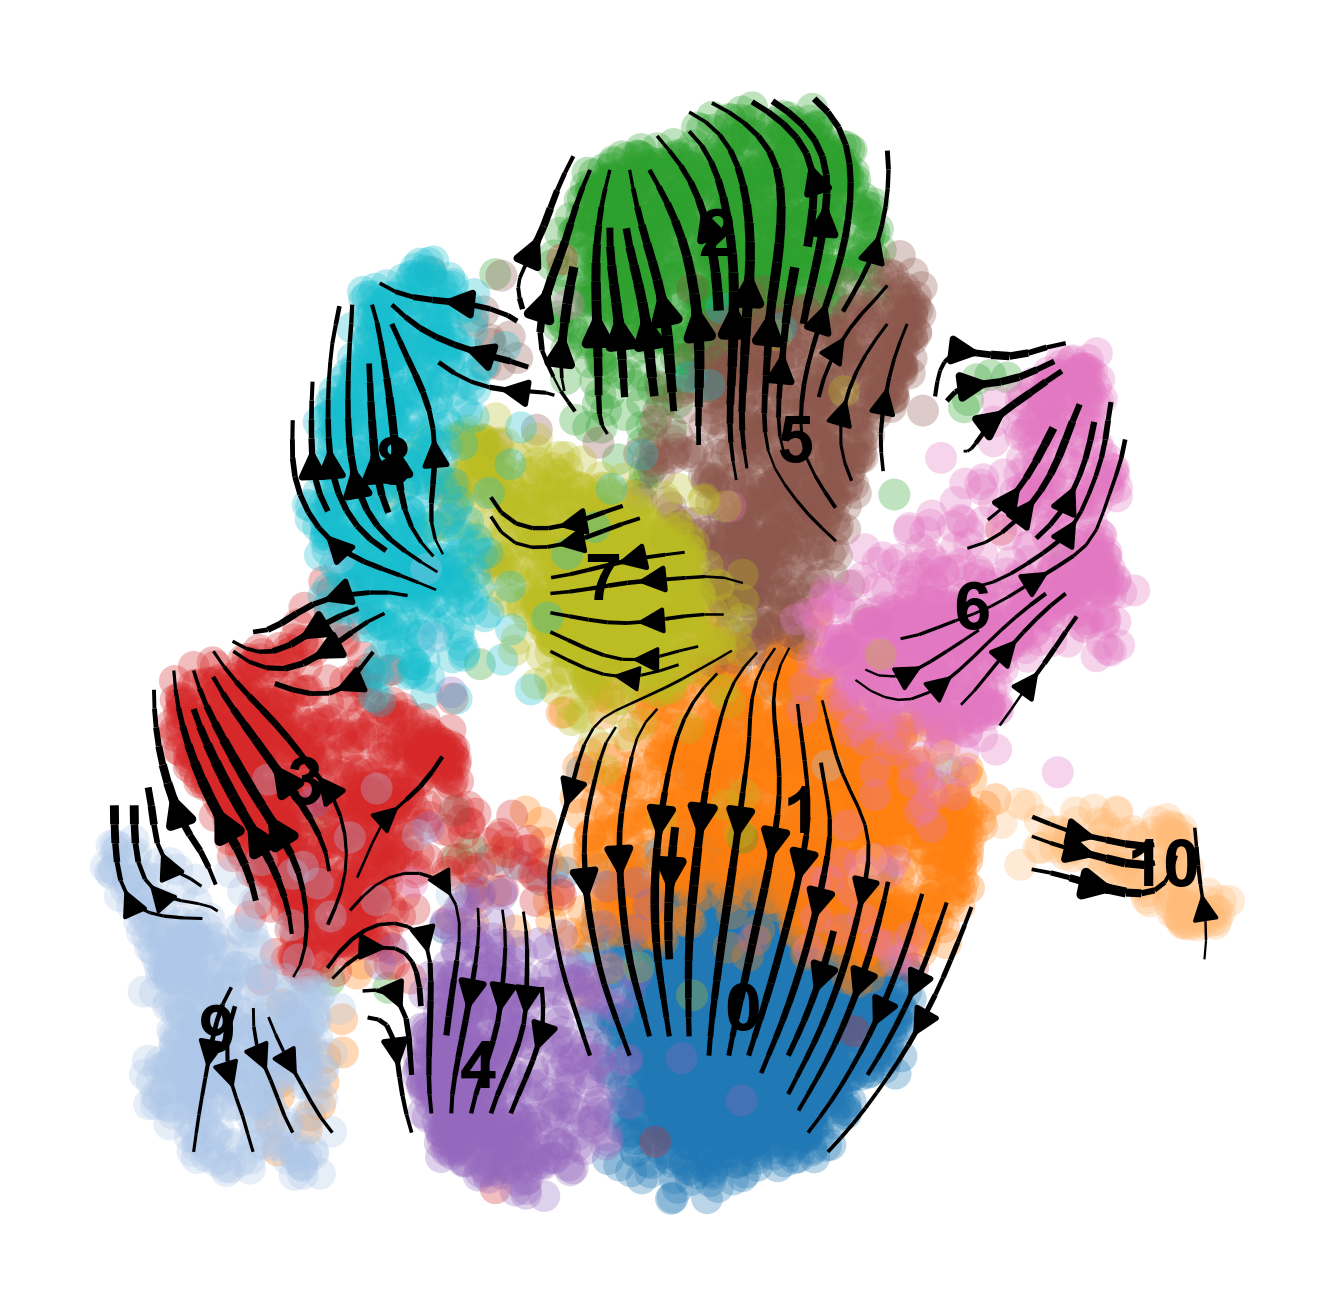

In [20]:
sc.settings.set_figure_params(dpi=200, color_map='viridis')
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)

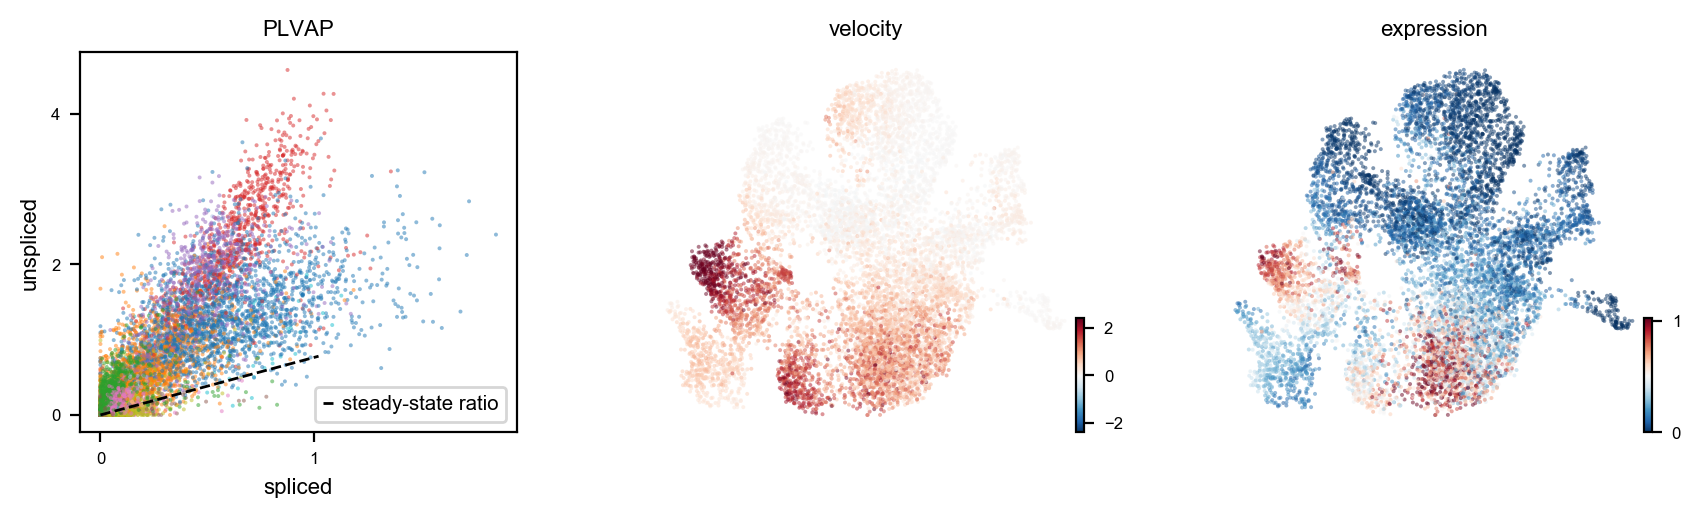

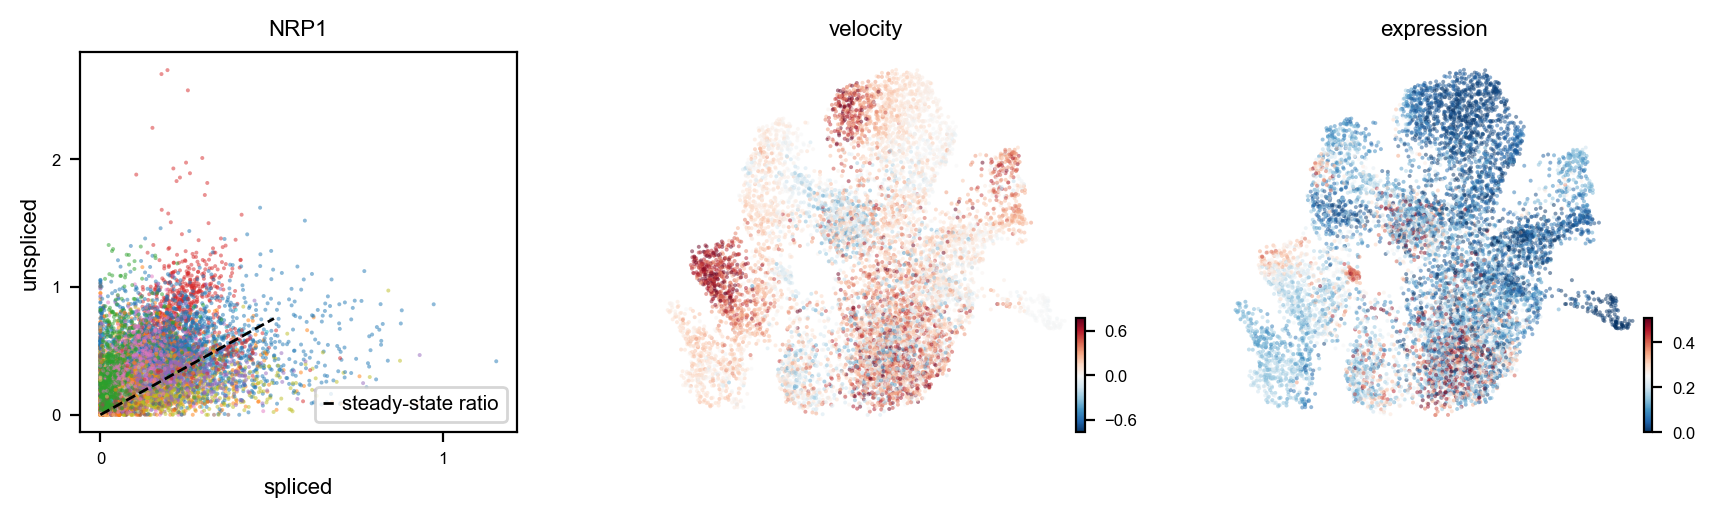

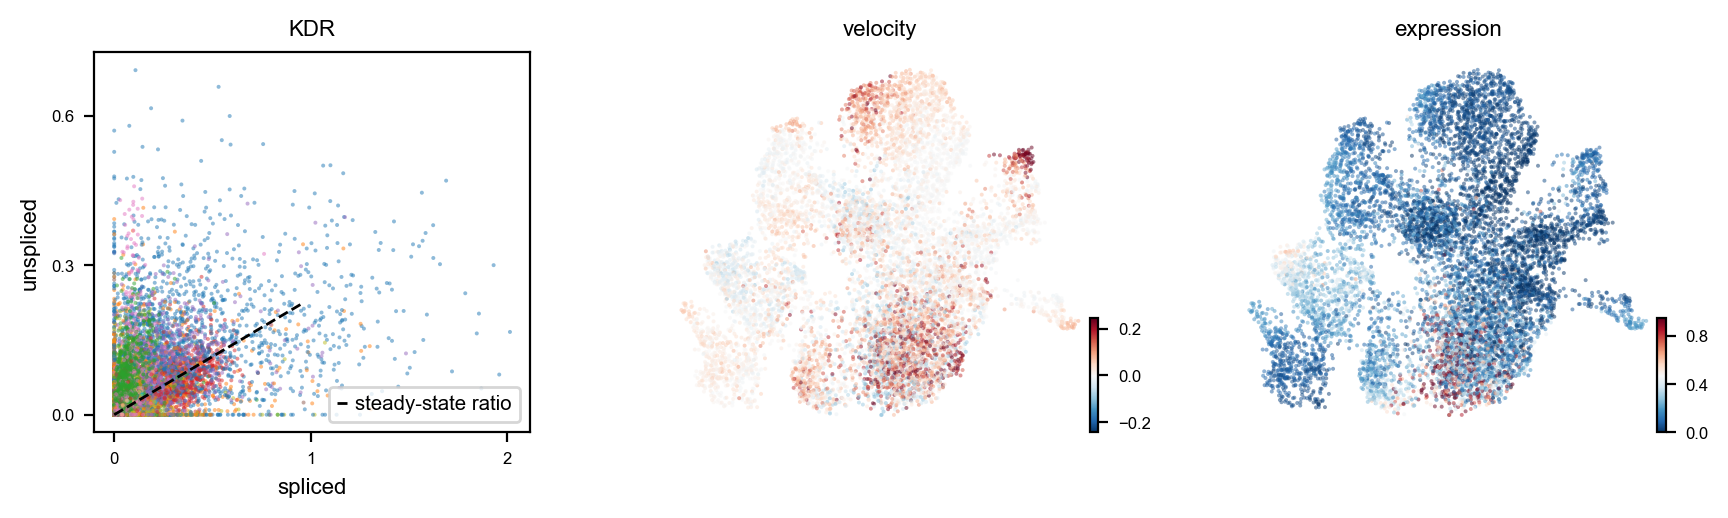

In [13]:
scv.settings.set_figure_params('scvelo') 
scv.pl.velocity(adata, var_names='PLVAP', colorbar=True, ncols=2)
scv.pl.velocity(adata, var_names='NRP1', colorbar=True, ncols=2 )
scv.pl.velocity(adata, var_names='KDR', colorbar=True, ncols=2 )

#   

#  Myeloid Clustering 

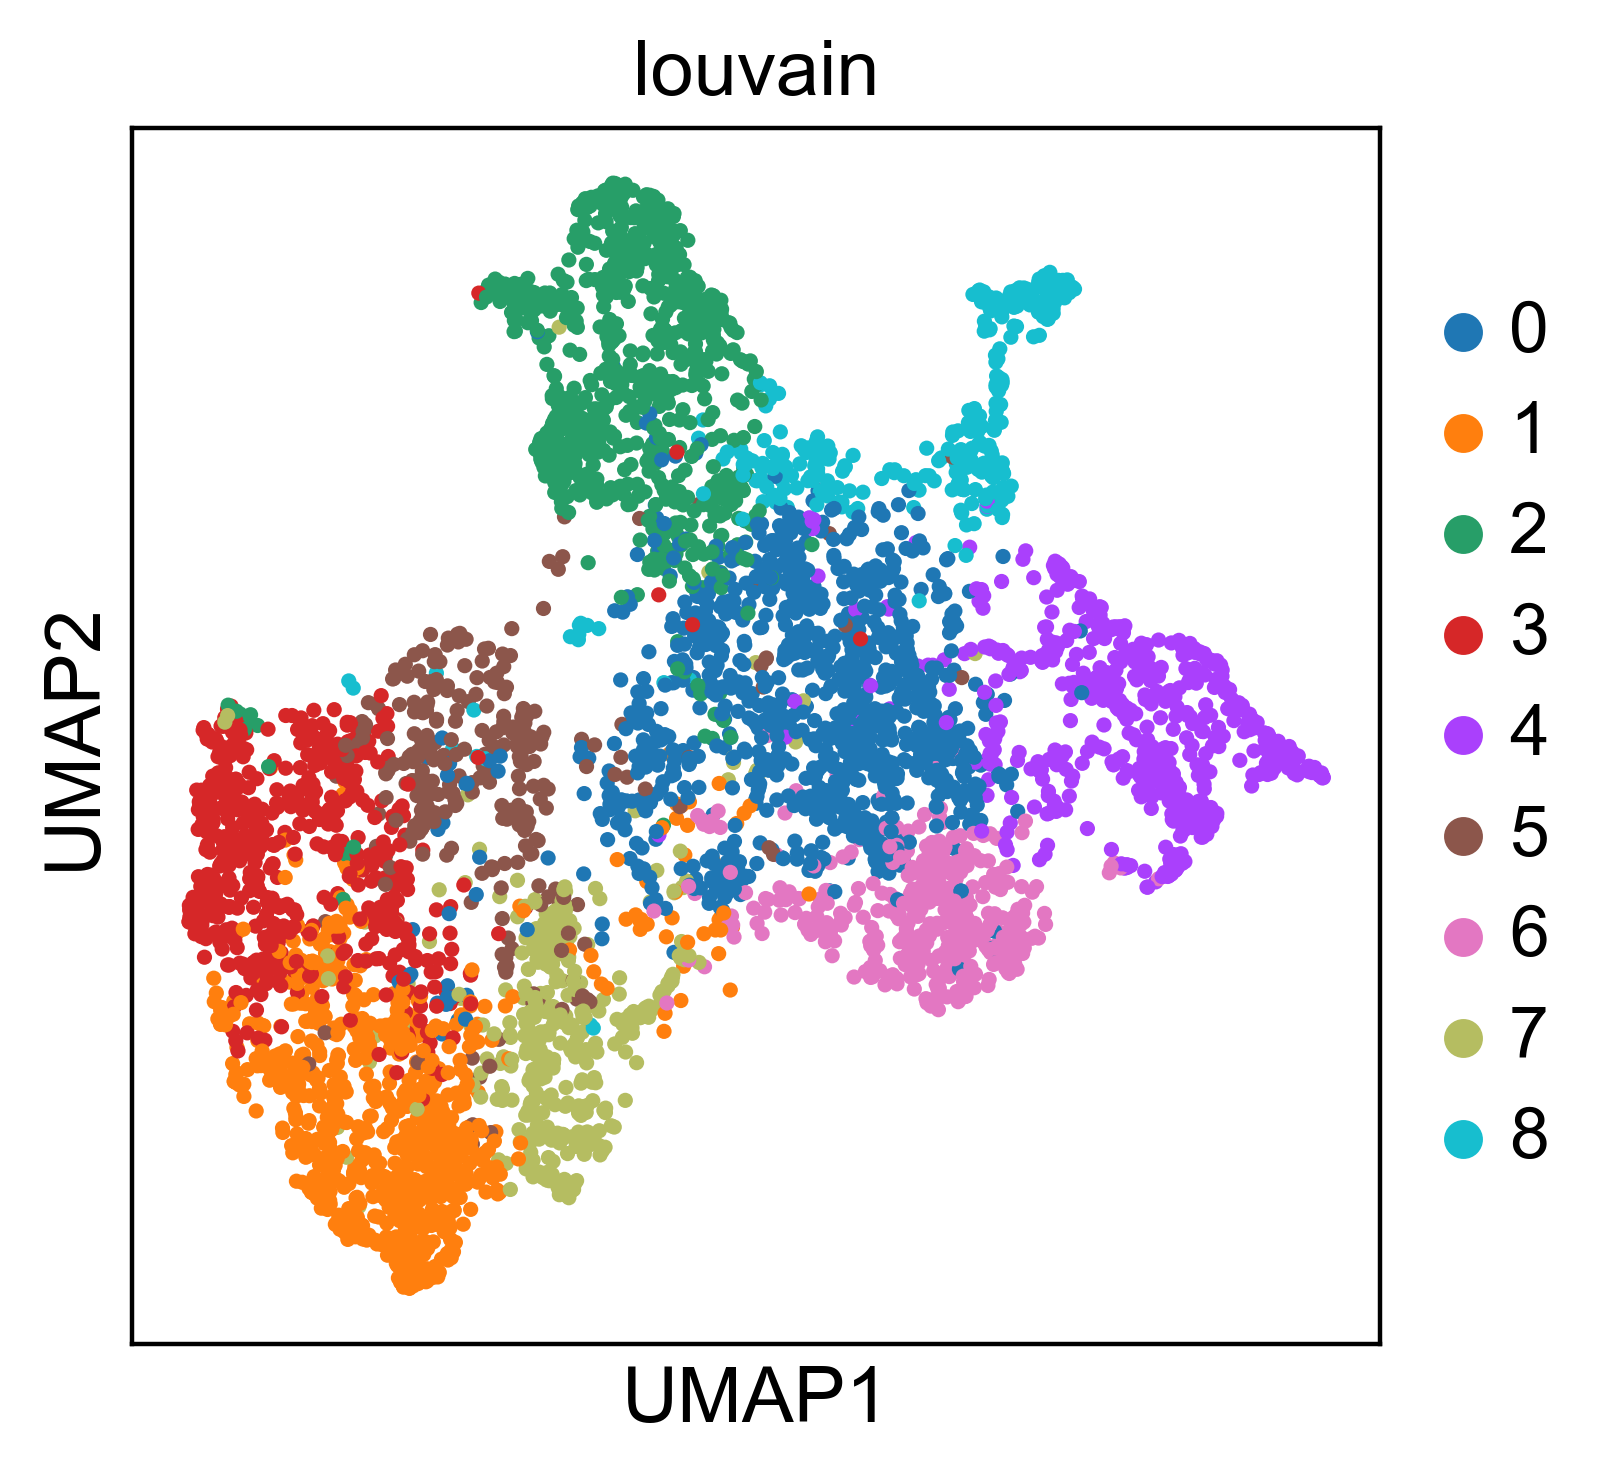

AnnData object with n_obs × n_vars = 5616 × 2384 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patientno', 'patient_tumorsection', 'ViralvsNonViral', 'PNC', 'PIC', 'NormalvsTumor', 'median genes exp', 'dpt_pseudotime', 'DC1', 'DC2', 'pDC', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'velocity_self_transition'
    var: 'gene_ids', 'n_cells', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'NormalvsTumor_colors', 'ViralvsNonViral_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'patientno_colors', 'pca', 'rank_genes_groups', 'velocity_graph', 'velocity_graph_neg', 'velocity_settings'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fr', 'X_diffmap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [14]:
sc.settings.set_figure_params(dpi=200, color_map='viridis')
adata = sc.read("./data/HCCmyewoF.h5ad")
sc.pl.umap(adata, color='louvain', size=30)

adata

### PNC (Peripheral Tumor, Adjacent Normal, Core Tumor)

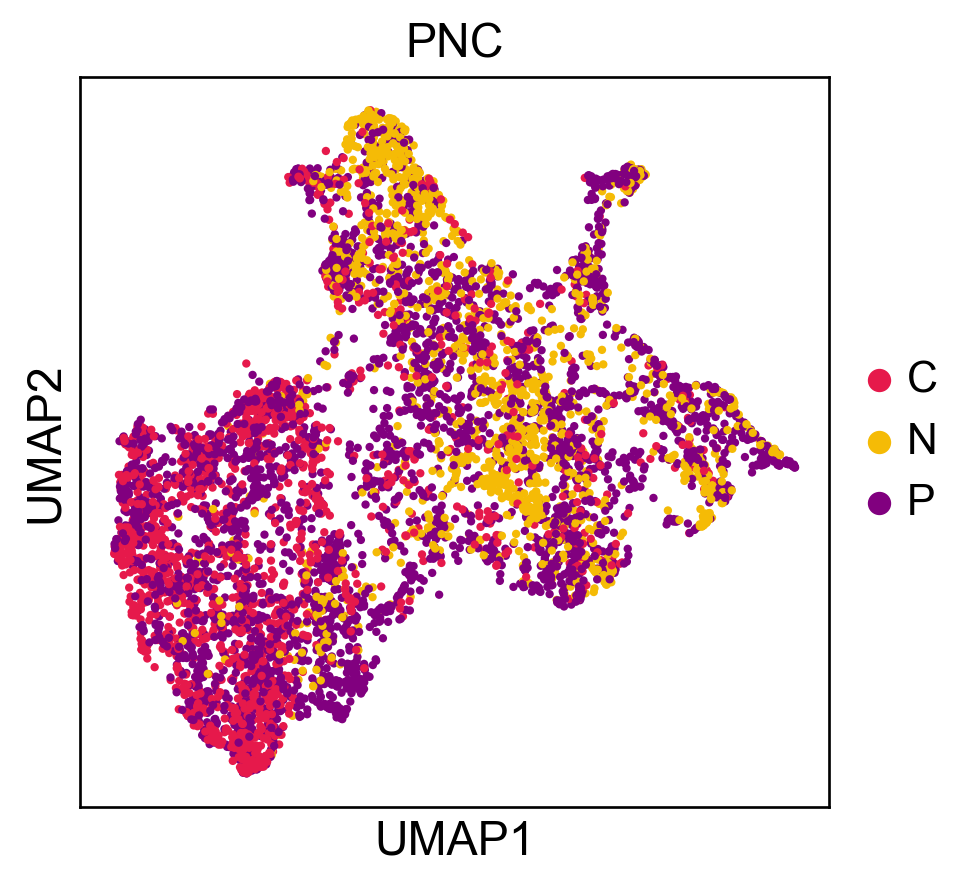

In [19]:
sc.settings.set_figure_params(dpi=120, color_map='viridis')
sc.pl.umap(adata, color=['PNC'], size=25, palette=['#e6194b', '#f5bb06', '#81007f'])

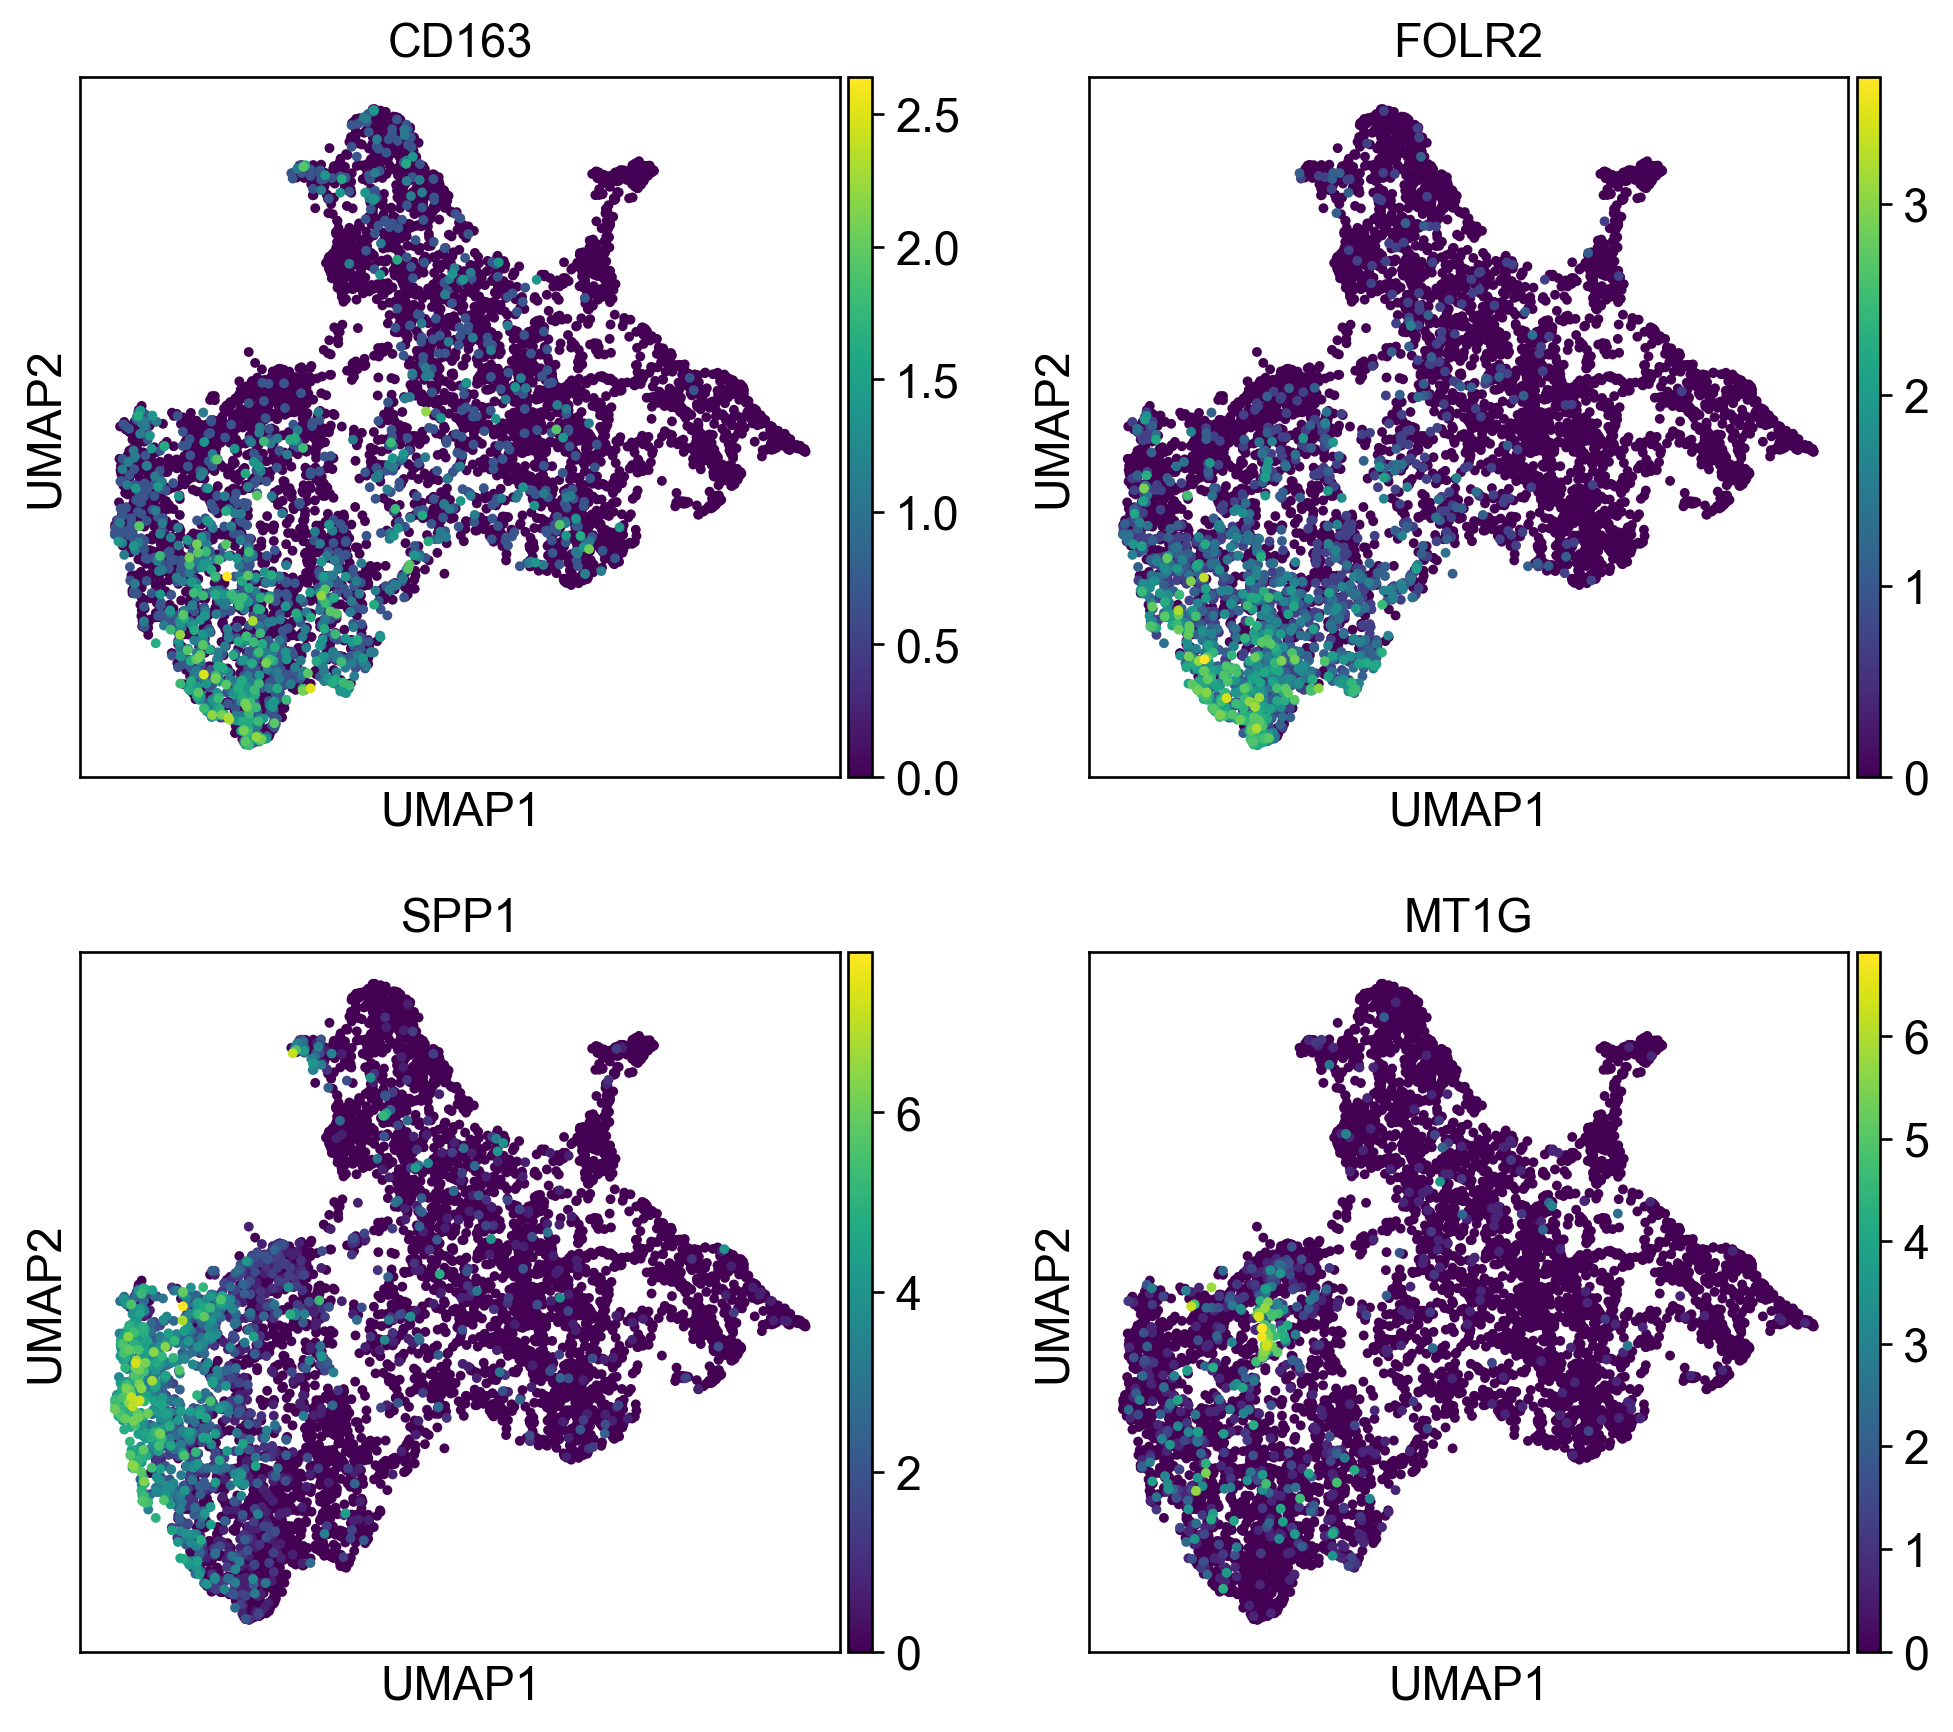

In [21]:
sc.pl.umap(adata, color=['CD163','FOLR2','SPP1','MT1G'], size=35,ncols=2)

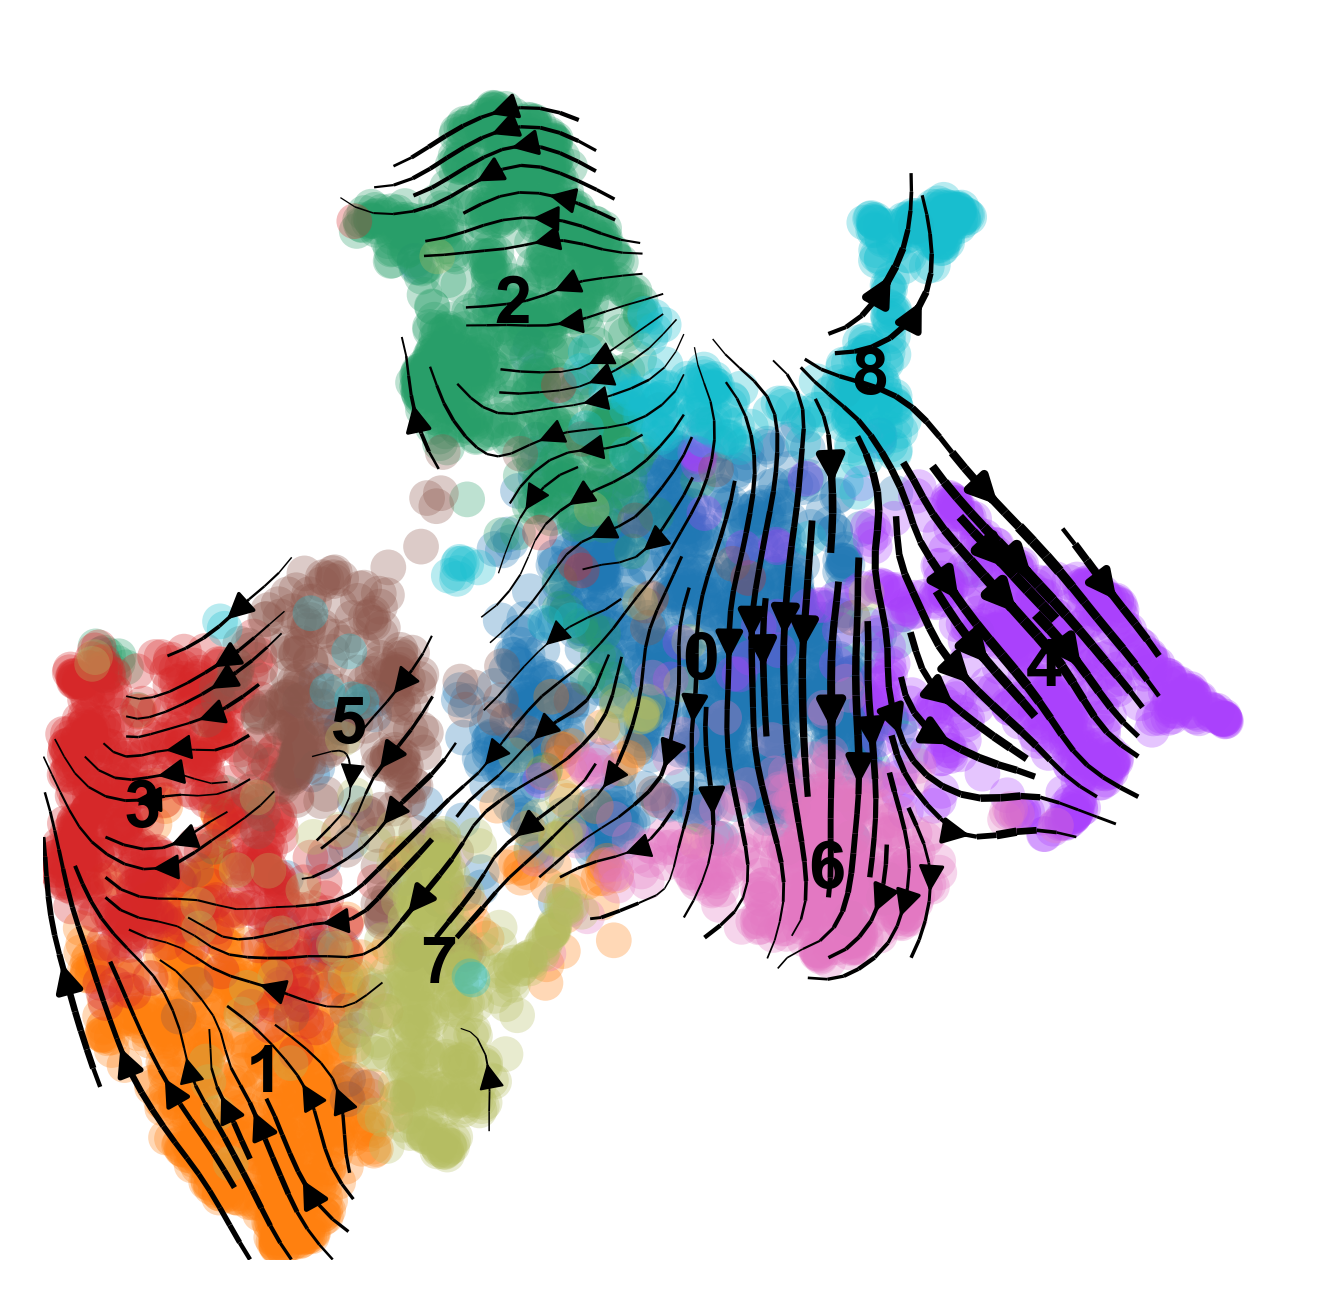

In [15]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)

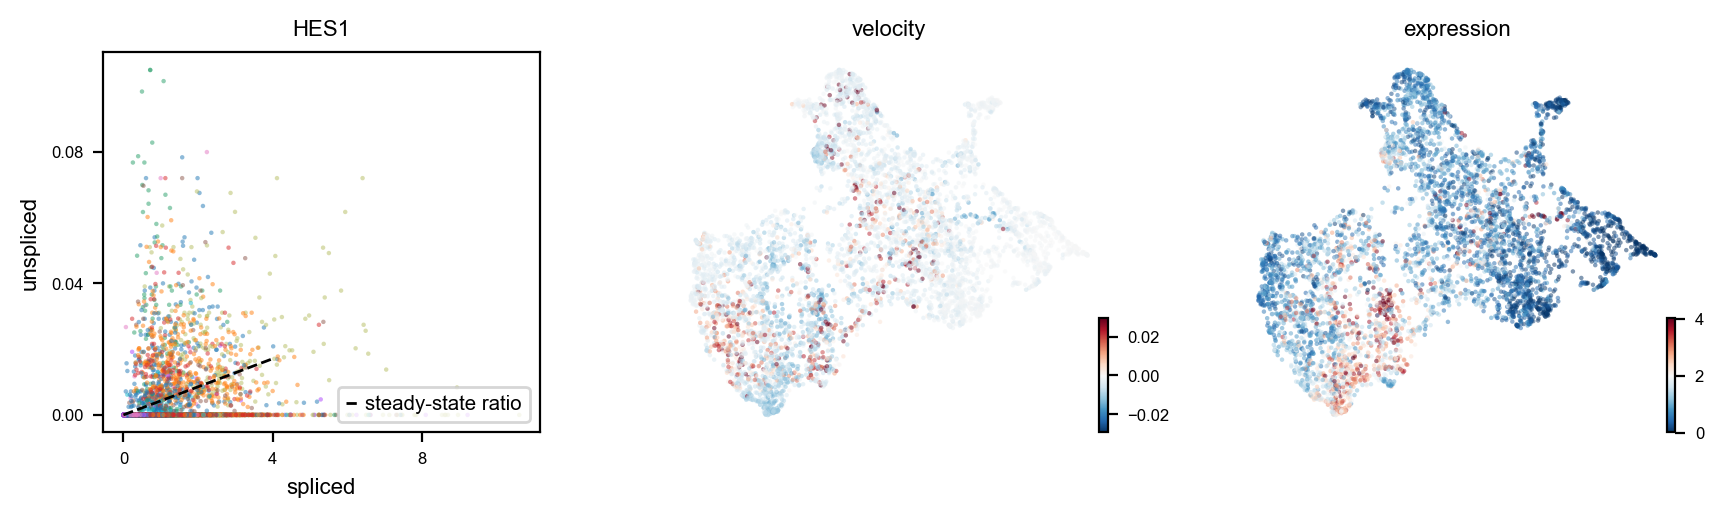

In [17]:
scv.settings.set_figure_params('scvelo') 
scv.pl.velocity(adata, var_names='HES1', colorbar=True, ncols=2 )

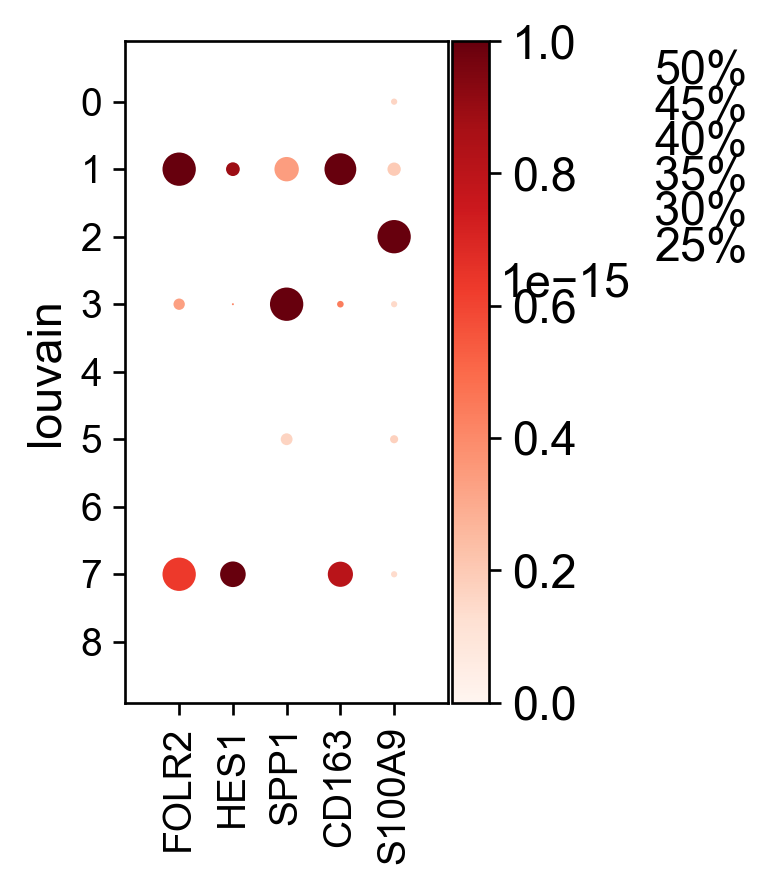

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.75, 0, 0.2, 0.5, 0.25])

In [22]:
sc.pl.dotplot(adata, ['FOLR2','HES1','SPP1','CD163','S100A9'], groupby='louvain', 
              dot_max=0.5, dot_min=0.2, standard_scale='var')